In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from google.colab import widgets, files, drive

In [ ]:
uploaded = files.upload()

Saving song_data_part1.csv to song_data_part1.csv


# 1.A Análisis exploratorio de los datos

In [ ]:
df = pd.read_csv('song_data_part1.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Rock And Roll All Nite,31,168733,0.0460,0.656,0.931,0.000000,1,0.0543,-5.827,1,0.0976,144.747,4,0.909
1,My Type,67,206393,0.0641,0.596,0.897,0.000052,10,0.0628,-2.940,1,0.0462,118.000,4,0.578
2,More Than Words,69,334106,0.4680,0.615,0.129,0.000000,6,0.1140,-14.892,1,0.0286,91.769,4,0.249
3,My Spine Is The Bassline,2,241693,0.2810,0.582,0.875,0.269000,0,0.0943,-10.601,1,0.0454,112.564,4,0.943
4,We Don't Play,61,217471,0.0914,0.654,0.815,0.000003,1,0.2260,-5.293,1,0.3150,135.082,4,0.430


<ipython-input-5-71c9e13bd993>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


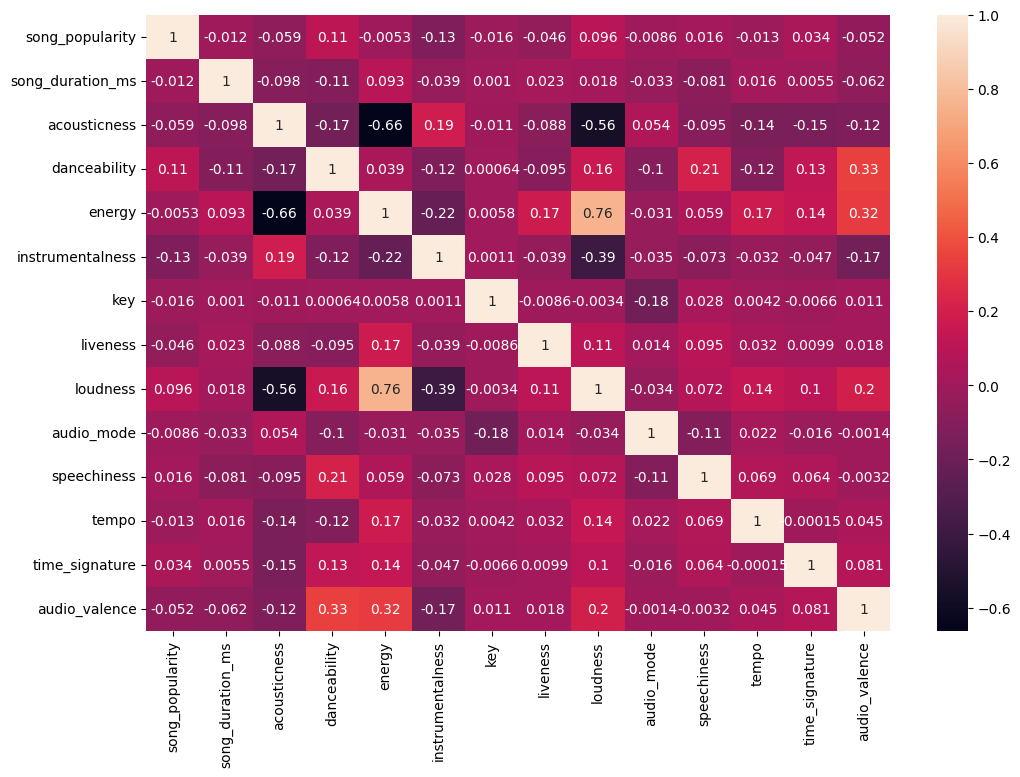

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Eliminamos el nombre de la canción ya que no interesa en el análisis

In [ ]:
df.drop(['song_name'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9417 entries, 0 to 9416
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   9417 non-null   int64  
 1   song_duration_ms  9417 non-null   int64  
 2   acousticness      9417 non-null   float64
 3   danceability      9417 non-null   float64
 4   energy            9417 non-null   float64
 5   instrumentalness  9417 non-null   float64
 6   key               9417 non-null   int64  
 7   liveness          9417 non-null   float64
 8   loudness          9417 non-null   float64
 9   audio_mode        9417 non-null   int64  
 10  speechiness       9417 non-null   float64
 11  tempo             9417 non-null   float64
 12  time_signature    9417 non-null   int64  
 13  audio_valence     9417 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 1.0 MB


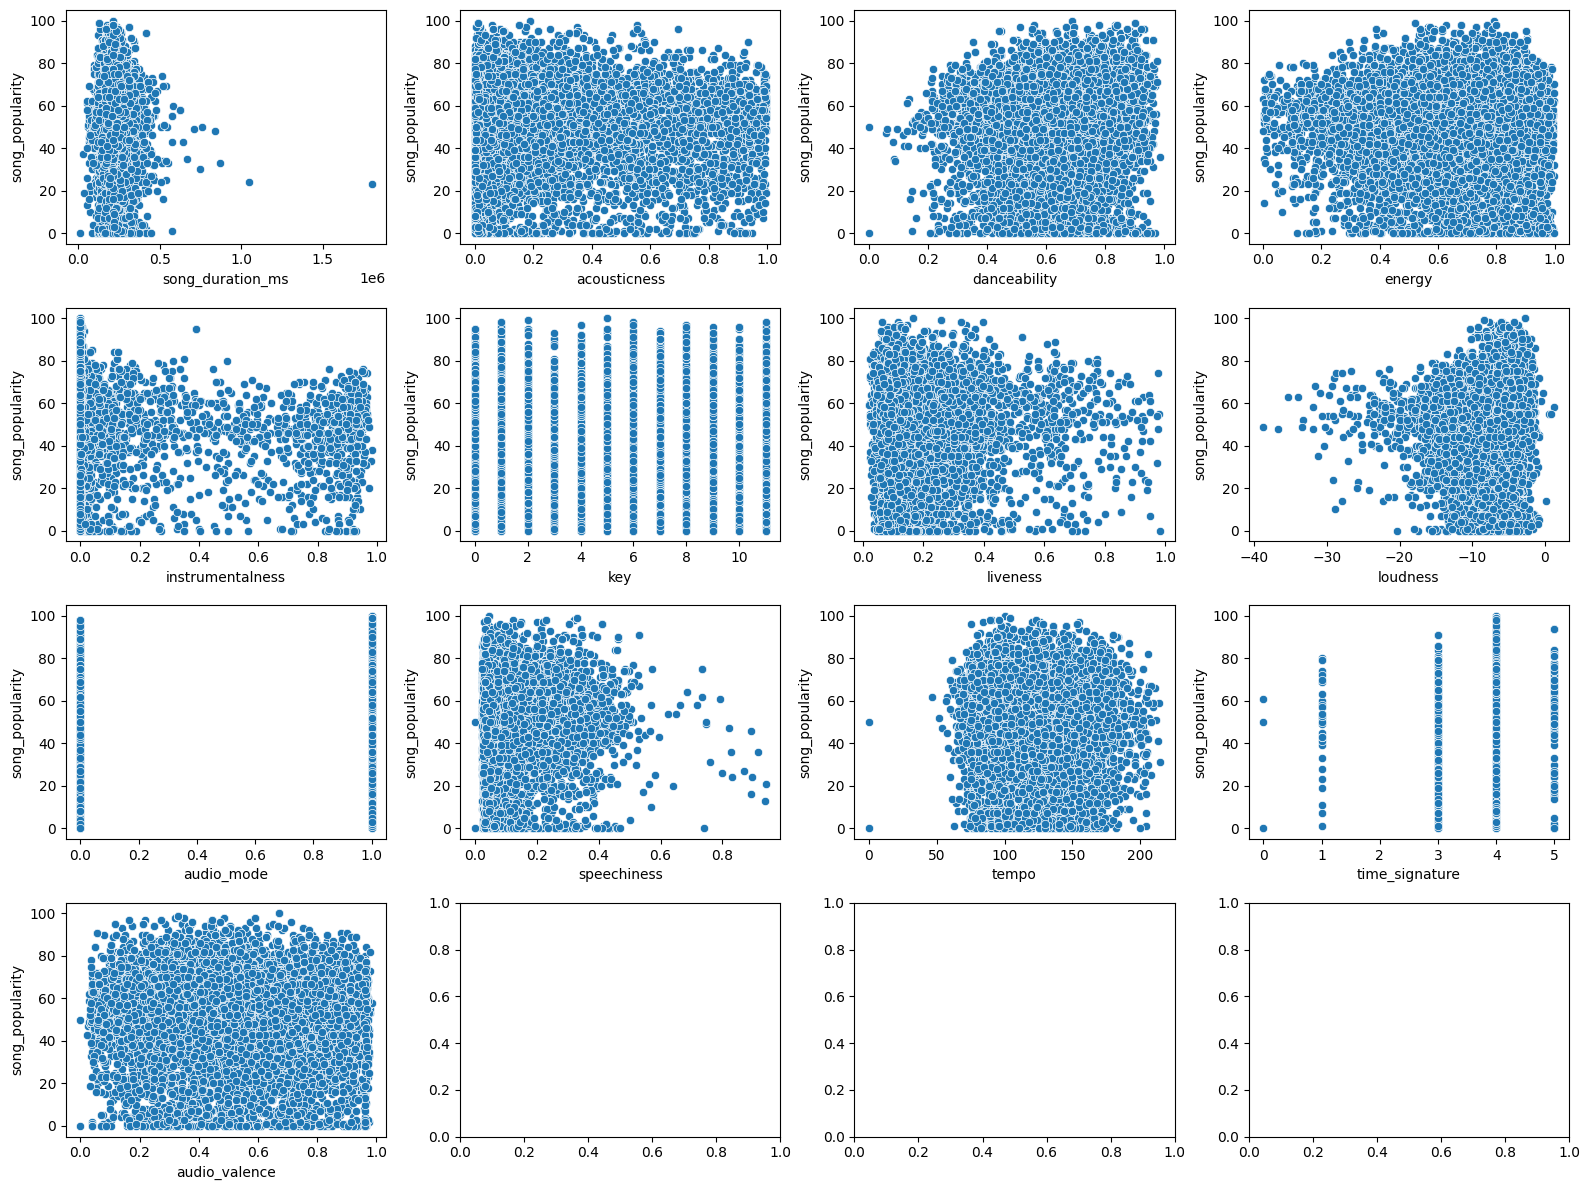

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))

for i, column in enumerate(df.columns[1:]):
    sns.scatterplot(x=df[column], y=df['song_popularity'], ax=axes[i//4, i%4])

plt.tight_layout()
plt.show()

Despues de selecciónar

*   acousticness
*   danceability
*   energy
*   instrumentalness
*   audio_valence

Hacemos modelos para evaluar cual de los modelos va mejor con todas las variables predictoras con respecto a nuestra variable objetivo.

No usamos la variable de loudness ya que esta correlacionada con la variable energy.



# 1.B. Construcción del Modelo de Regresión

In [ ]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'audio_valence']

X = df[features]
y = df['song_popularity']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

orders = range(1, 9)

results_poly = []

for order in orders:
    poly_model = make_pipeline(PolynomialFeatures(order), LinearRegression())
    poly_model.fit(X_train, y_train)

    y_pred_train = poly_model.predict(X_train)
    y_pred_val = poly_model.predict(X_val)

    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)

    r2_val = r2_score(y_val, y_pred_val)
    rmse_val = sqrt(mean_squared_error(y_val, y_pred_val))
    mae_val = mean_absolute_error(y_val, y_pred_val)

    results_poly.append(['Polynomial', order, r2_train, r2_val, rmse_train, rmse_val, mae_train, mae_val])

results_poly_df = pd.DataFrame(results_poly, columns=['Model', 'Degree', 'R2 Train', 'R2 Val', 'RMSE Train', 'RMSE Val', 'MAE Train', 'MAE Val'])

In [ ]:
results_poly_df.head(10)

,Model,Degree,R2 Train,R2 Val,RMSE Train,RMSE Val,MAE Train,MAE Val
0,Polynomial,1,0.038049,0.039591,21.331237,21.225756,17.030854,16.774913
1,Polynomial,2,0.068197,0.057924,20.994305,21.022203,16.716664,16.581407
2,Polynomial,3,0.080902,0.059872,20.850688,21.000449,16.612195,16.546462
3,Polynomial,4,0.094188,0.053420,20.699433,21.072393,16.508506,16.630445
4,Polynomial,5,0.112735,0.012931,20.486426,21.518348,16.343103,16.952037
5,Polynomial,6,0.140709,-0.188309,20.160886,23.610212,16.007991,17.715976
6,Polynomial,7,0.190212,-2.003894,19.571555,37.538544,15.338181,20.410404
7,Polynomial,8,0.260877,-177.135938,18.698117,289.075261,14.232567,58.309999


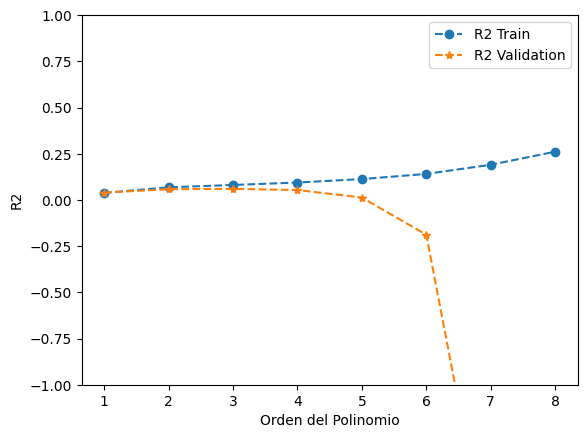

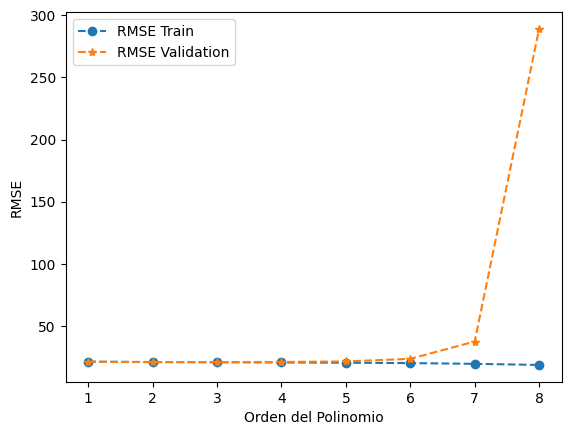

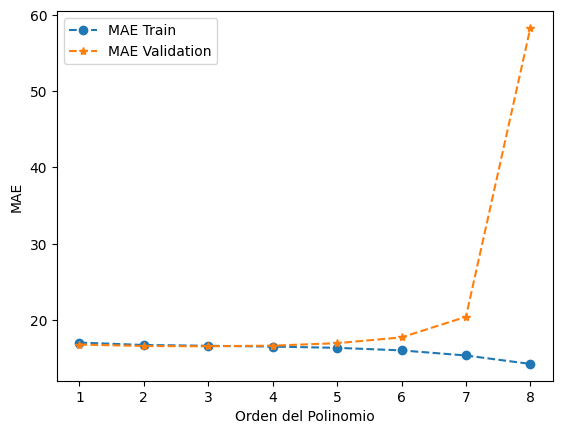

In [ ]:
plt.plot(results_poly_df['Degree'], results_poly_df['R2 Train'], '--o', label='R2 Train')
plt.plot(results_poly_df['Degree'], results_poly_df['R2 Val'], '--*', label='R2 Validation')
plt.xlabel('Orden del Polinomio')
plt.ylabel('R2')
plt.ylim(-1,1)
plt.legend()
plt.show()

plt.plot(results_poly_df['Degree'], results_poly_df['RMSE Train'], '--o', label='RMSE Train')
plt.plot(results_poly_df['Degree'], results_poly_df['RMSE Val'], '--*', label='RMSE Validation')
plt.xlabel('Orden del Polinomio')
plt.ylabel('RMSE')
plt.legend()
plt.show()

plt.plot(results_poly_df['Degree'], results_poly_df['MAE Train'], '--o', label='MAE Train')
plt.plot(results_poly_df['Degree'], results_poly_df['MAE Val'], '--*', label='MAE Validation')
plt.xlabel('Orden del Polinomio')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
selected_model = results_poly_df.loc[results_poly_df['R2 Val'].idxmax()]
print("\nSelected Model:")
print(selected_model)

best_order = selected_model['Degree']
selected_model = make_pipeline(PolynomialFeatures(best_order), LinearRegression())
selected_model.fit(X_train, y_train)

coefficients = selected_model.named_steps['linearregression'].coef_
print('\nCoefficients:', coefficients)
print('\nIntercept:', selected_model.named_steps['linearregression'].intercept_)


Selected Model:
Model         Polynomial
Degree                 3
R2 Train        0.080902
R2 Val          0.059872
RMSE Train     20.850688
RMSE Val       21.000449
MAE Train      16.612195
MAE Val        16.546462
Name: 2, dtype: object

Coefficients: [ 4.29858156e-11 -9.71223908e+01  8.96337586e+00 -6.53156217e+01
  1.25757705e+01  5.06535973e+01  9.13967574e+01  1.32290921e+02
  1.38091987e+02  6.01715035e+01 -1.22985134e+01  1.53786093e+00
  7.91726918e+01 -2.02644064e+02 -6.41095734e+01  1.22175320e+02
 -1.15009473e+01 -6.20783852e+01  5.61860208e+01  2.01263029e+01
 -5.41342723e+01 -1.12604330e+01 -5.77835963e+01 -1.02084676e+02
 -2.28464501e+01 -6.87152833e+00 -9.65628400e+01  6.33492448e+00
  5.88631846e+01  3.20484949e+01 -7.35462940e+01 -3.31700528e+01
  9.34421311e+00 -4.00922835e+01 -2.70657163e+01 -1.64922293e+01
 -8.38507004e+00 -4.75803012e+01  5.64277891e+01  1.14207647e+02
 -1.20941335e+01  2.79822565e+01 -4.09402089e+00  8.55391834e+01
  8.08391901e+00 -9.87008745e+

## Regularización con Ridge

In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

results_poly_ridge = []

for alpha in alphas:
        poly_model = make_pipeline(PolynomialFeatures(3), Ridge(alpha=alpha))
        poly_model.fit(X_train, y_train)

        y_pred_train = poly_model.predict(X_train)
        y_pred_val = poly_model.predict(X_val)

        r2_train = r2_score(y_train, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)

        r2_val = r2_score(y_val, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
        mae_val = mean_absolute_error(y_val, y_pred_val)

        results_poly_ridge.append(['Ridge', 3, alpha, r2_train, r2_val, rmse_train, rmse_val, mae_train, mae_val])

results_poly_ridge_df = pd.DataFrame(results_poly_ridge, columns=['Model', 'Degree', 'Alpha', 'R2 Train', 'R2 Val', 'RMSE Train', 'RMSE Val', 'MAE Train', 'MAE Val'])

In [ ]:
results_poly_ridge_df.head(50)

,Model,Degree,Alpha,R2 Train,R2 Val,RMSE Train,RMSE Val,MAE Train,MAE Val
0,Ridge,3,0.001,0.080899,0.059952,20.850722,20.999556,16.612335,16.545943
1,Ridge,3,0.010,0.080790,0.060459,20.851964,20.993898,16.613261,16.542942
2,Ridge,3,0.100,0.079743,0.062112,20.863834,20.975422,16.621647,16.528527
3,Ridge,3,1.000,0.075479,0.062369,20.912117,20.972545,16.654591,16.526150
4,Ridge,3,10.000,0.068716,0.060463,20.988464,20.993845,16.705697,16.553654
5,Ridge,3,100.000,0.055795,0.054203,21.133563,21.063670,16.821292,16.606879


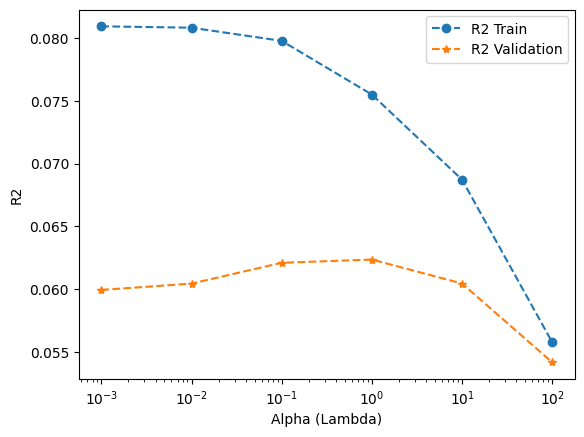

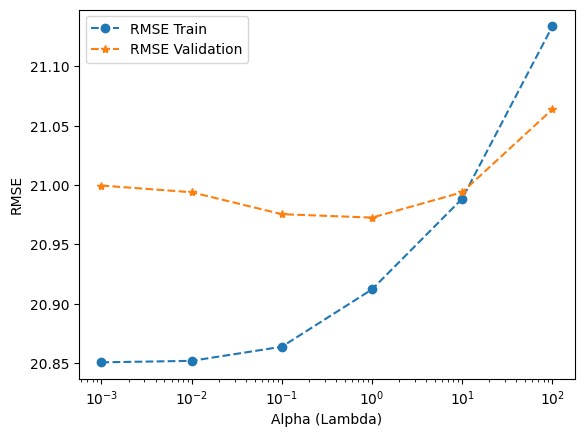

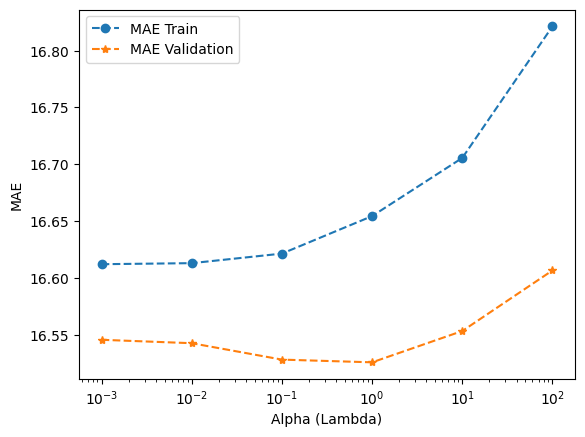

In [ ]:
plt.plot(results_poly_ridge_df['Alpha'], results_poly_ridge_df['R2 Train'], '--o', label='R2 Train')
plt.plot(results_poly_ridge_df['Alpha'], results_poly_ridge_df['R2 Val'], '--*', label='R2 Validation')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('R2')
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(results_poly_ridge_df['Alpha'], results_poly_ridge_df['RMSE Train'], '--o', label='RMSE Train')
plt.plot(results_poly_ridge_df['Alpha'], results_poly_ridge_df['RMSE Val'], '--*', label='RMSE Validation')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('RMSE')
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(results_poly_ridge_df['Alpha'], results_poly_ridge_df['MAE Train'], '--o', label='MAE Train')
plt.plot(results_poly_ridge_df['Alpha'], results_poly_ridge_df['MAE Val'], '--*', label='MAE Validation')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('MAE')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
selected_model_ridge = results_poly_ridge_df.loc[results_poly_ridge_df['R2 Val'].idxmax()]
print("\nSelected Model:")
print(selected_model_ridge)

best_alpha = selected_model_ridge['Alpha']
selected_model_ridge = make_pipeline(PolynomialFeatures(3), Ridge(alpha=best_alpha))
selected_model_ridge.fit(X_train, y_train)

coefficients = selected_model_ridge.named_steps['ridge'].coef_
print('\nCoefficients:', coefficients)
print('\nIntercept:', selected_model_ridge.named_steps['ridge'].intercept_)


Selected Model:
Model             Ridge
Degree                3
Alpha               1.0
R2 Train       0.075479
R2 Val         0.062369
RMSE Train    20.912117
RMSE Val      20.972545
MAE Train     16.654591
MAE Val        16.52615
Name: 3, dtype: object

Coefficients: [  0.           4.20231025  15.03293296  18.08063867 -13.357147
   2.08925277  -1.1342908   11.14582488   0.04755209  18.34223393
   6.46019406   1.12963635  15.27242856 -26.27212989   0.46623305
   3.17809166 -12.58905383   2.97652511  11.17284648  -0.10994477
 -21.96149644  11.11090065 -11.56507296 -32.58464825   0.83685973
 -12.44410334 -12.64717219  12.52649022  17.72128823   4.48809018
   4.93707731 -16.14225049  -4.9577354   -9.68685908  -5.89428622
  -8.76133001  -2.00974795   0.36823266 -12.51855424   9.95367321
  -0.30233535 -17.09085506 -10.87796403  10.65806136  12.58035393
 -26.67703634 -30.70205473  11.18521566  15.34103777   9.427624
  -6.8192898    8.96237949  -4.66677083  13.98897248  13.76193636
  15.07

## Regularización con Lasso

In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

results_poly_lasso = []

for alpha in alphas:
        poly_model = make_pipeline(PolynomialFeatures(3), Lasso(alpha=alpha))
        poly_model.fit(X_train, y_train)

        y_pred_train = poly_model.predict(X_train)
        y_pred_val = poly_model.predict(X_val)

        r2_train = r2_score(y_train, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)

        r2_val = r2_score(y_val, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
        mae_val = mean_absolute_error(y_val, y_pred_val)

        results_poly_lasso.append(['Lasso', 3, alpha, r2_train, r2_val, rmse_train, rmse_val, mae_train, mae_val])

results_poly_lasso_df = pd.DataFrame(results_poly_lasso, columns=['Model', 'Degree', 'Alpha', 'R2 Train', 'R2 Val', 'RMSE Train', 'RMSE Val', 'MAE Train', 'MAE Val'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+05, tolerance: 3.118e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
results_poly_lasso_df.head(10)

,Model,Degree,Alpha,R2 Train,R2 Val,RMSE Train,RMSE Val,MAE Train,MAE Val
0,Lasso,3,0.001,0.078809,0.061919,20.874414,20.977582,16.632468,16.535208
1,Lasso,3,0.010,0.069947,0.061285,20.974583,20.984670,16.699826,16.547528
2,Lasso,3,0.100,0.046937,0.047740,21.232462,21.135514,16.901418,16.653709
3,Lasso,3,1.000,0.000000,-0.002187,21.749012,21.682505,17.298431,17.098424
4,Lasso,3,10.000,0.000000,-0.002187,21.749012,21.682505,17.298431,17.098424
5,Lasso,3,100.000,0.000000,-0.002187,21.749012,21.682505,17.298431,17.098424


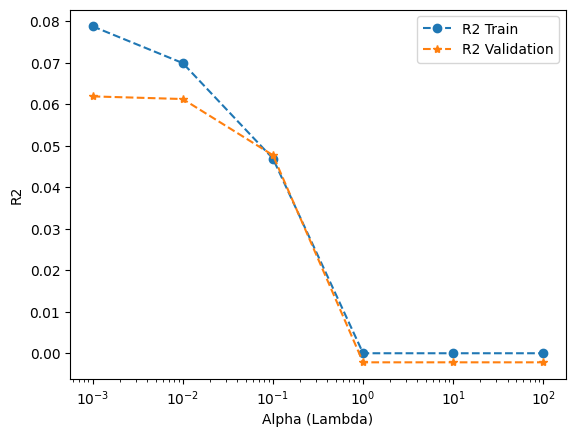

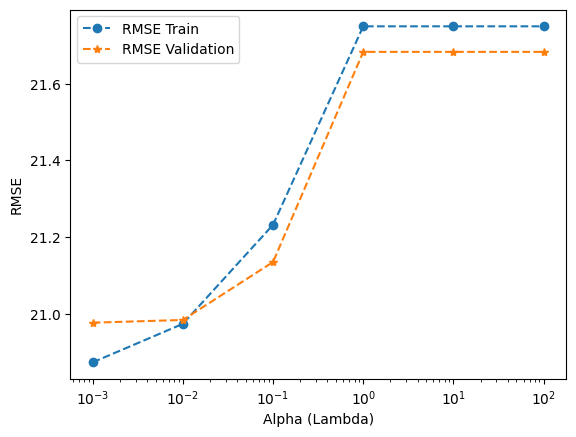

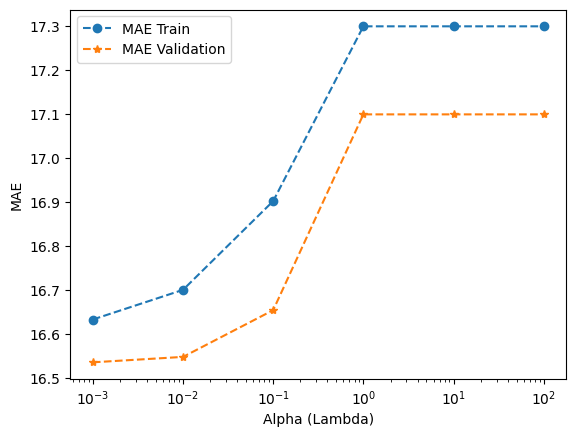

In [ ]:
plt.plot(results_poly_lasso_df['Alpha'], results_poly_lasso_df['R2 Train'], '--o', label='R2 Train')
plt.plot(results_poly_lasso_df['Alpha'], results_poly_lasso_df['R2 Val'], '--*', label='R2 Validation')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('R2')
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(results_poly_lasso_df['Alpha'], results_poly_lasso_df['RMSE Train'], '--o', label='RMSE Train')
plt.plot(results_poly_lasso_df['Alpha'], results_poly_lasso_df['RMSE Val'], '--*', label='RMSE Validation')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('RMSE')
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(results_poly_lasso_df['Alpha'], results_poly_lasso_df['MAE Train'], '--o', label='MAE Train')
plt.plot(results_poly_lasso_df['Alpha'], results_poly_lasso_df['MAE Val'], '--*', label='MAE Validation')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('MAE')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
selected_model_lasso = results_poly_lasso_df.loc[results_poly_lasso_df['R2 Val'].idxmax()]
print("\nSelected Model:")
print(selected_model_lasso)

best_alpha = selected_model_lasso['Alpha']
selected_model_lasso = make_pipeline(PolynomialFeatures(3), Lasso(alpha=best_alpha))
selected_model_lasso.fit(X_train, y_train)

coefficients = selected_model_lasso.named_steps['lasso'].coef_
print('\nCoefficients:', coefficients)
print('\nIntercept:', selected_model_lasso.named_steps['lasso'].intercept_)


Selected Model:
Model             Lasso
Degree                3
Alpha             0.001
R2 Train       0.078809
R2 Val         0.061919
RMSE Train    20.874414
RMSE Val      20.977582
MAE Train     16.632468
MAE Val       16.535208
Name: 0, dtype: object

Coefficients: [  0.          -0.84158954  28.44507903  35.12883331  -3.53012812
  14.48841915  14.61516519  22.22294346  -0.          39.00371689
   1.12438278 -11.38685142  12.88008287 -93.0824856    0.
   0.          -5.46058406 -27.7051647   30.42883781  -0.
 -36.29746448   4.7833374  -10.54761132 -55.40570877  -8.49794193
  -8.17055509 -35.50450142  39.63293418  32.84340165   0.
  -0.         -27.10804086  -0.         -27.32335483  -8.29024349
  -5.66496198  -3.89793723  -0.           0.          46.59995998
   0.38227602  -5.56955276 -32.42625381  52.81821732  27.29966301
 -55.94607393 -39.72654159   9.77267288  45.37981194   0.
  -7.617778    16.43434879 -26.09949541   2.3167942   14.4034282
  32.97264893]

Intercept: 27.931879

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+05, tolerance: 3.118e+02
  model = cd_fast.enet_coordinate_descent(


Teniendo en cuenta los anteriores resultados:

- Podemos ver que en la regresión polinómica de grado 3 parece tener coeficientes significativamente más altos en magnitud en comparación con Ridge y Lasso. Esto podría indicar overfitting.

- Ridge y Lasso muestran algunas mejoras en las métricas en comparación con la regresión polinómica sin regularización. Pero no es mucha la diferencia.

- Dado que la interpretación puede ser un factor importante, la regresión Ridge podría ser preferible debido a su capacidad para reducir la multicolinealidad y estabilizar los coeficientes. Además, Ridge parece tener un equilibrio adecuado entre R2 y las métricas de error.

Por lo tanto, considerando la estabilidad, generalización y la interpretación, optamos por la regularización Ridge de grado 3 como mejor modelo.

# 1.C. Validación y entrenamiento final

Finalmente al elegir el modelo con regularización Ridge y de volver a entrenarlo con todo el conjunto de datos estos fueron  los resultados:

In [ ]:
best_order = 3
best_alpha = 1

final_model = make_pipeline(PolynomialFeatures(best_order), Ridge(alpha=best_alpha))
final_model.fit(X, y)

coefficients_final = final_model.named_steps['ridge'].coef_
intercept_final = final_model.named_steps['ridge'].intercept_

y_pred_final = final_model.predict(X)

r2_final = r2_score(y, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y, y_pred_final))
mae_final = mean_absolute_error(y, y_pred_final)

print("\nCoeficientes Finales del Modelo:")
print("Coeficientes Finales:", coefficients_final)
print("Intercepto Final:", intercept_final)

print("\nMétricas Finales del Modelo:")
print("R2 Final:", r2_final)
print("RMSE Final:", rmse_final)
print("MAE Final:", mae_final)


Coeficientes Finales del Modelo:
Coeficientes Finales: [ 0.00000000e+00  2.79588040e+00  1.53080608e+01  1.68592026e+01
 -1.54648832e+01  2.94443378e+00 -1.64532485e+00  1.54278124e+01
 -1.92683953e-01  1.92973955e+01  9.64684281e+00 -3.85514767e+00
  1.33396972e+01 -2.38092749e+01  6.98185694e+00  6.13326070e+00
 -1.51567022e+01 -4.19352077e+00  1.23484131e+01  1.54856663e-01
 -1.91243036e+01  8.27981872e+00 -7.07230569e+00 -3.15736053e+01
  2.11982595e+00 -1.60428872e+01 -1.77643946e+01  1.39063073e+01
  2.47919159e+01  6.84875553e+00  4.88973014e+00 -1.45572831e+01
 -1.07536163e+01 -1.23487326e+01 -1.52706791e+01 -6.55558670e+00
 -1.39003190e+00  2.10260276e-02 -1.95533741e+01  1.29756581e+01
  5.48292375e-01 -1.45040772e+01 -5.77083493e+00  1.30406255e+01
  1.46288825e+01 -3.20449893e+01 -3.06034841e+01  1.11551645e+01
  1.35322904e+01  1.53235372e+01 -1.02793936e+01  9.85469279e+00
 -4.62693579e+00  9.71055905e+00  1.63765977e+01  1.19870791e+01]
Intercepto Final: 38.369094894327